# Problem Statement 4
## Create a program that fits a mixture of Gaussians to a dataset of handwritten digit features and clusters them into distinct groups. Use the Expectation-Maximization method to estimate the parameters of the Gaussian mixture model.

In [4]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

In [6]:
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0 #normalize pixels
y = mnist.target.astype(int)

Loading MNIST dataset...


In [12]:
pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(X)

In [14]:
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, covariance_type="full", random_state=42)
gmm.fit(X_reduced)

GaussianMixture(n_components=10, random_state=42)

In [16]:
clusters = gmm.predict(X_reduced)

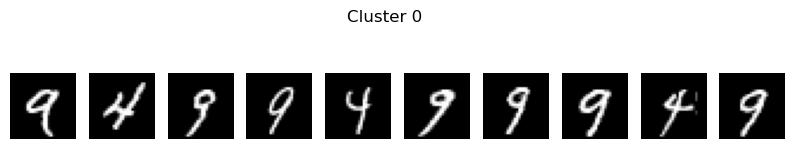

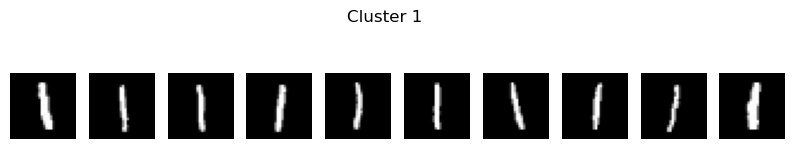

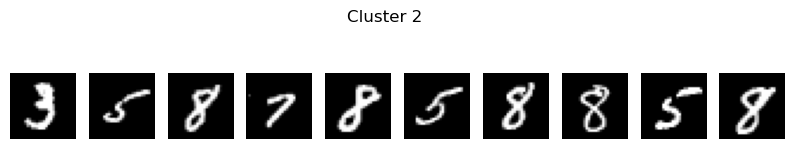

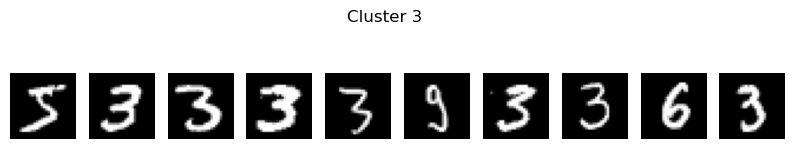

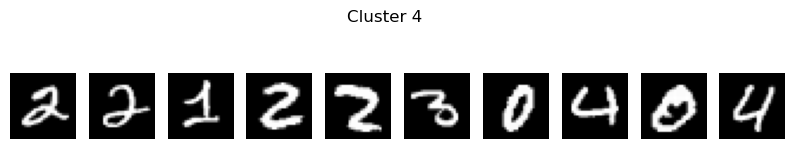

In [20]:
def plot_cluster_images(cluster_number, num_samples=10):
    indices = np.where(clusters == cluster_number)[0][:num_samples]
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx].reshape(28, 28), cmap="gray")
        axes[i].axis("off")
    plt.suptitle(f"Cluster {cluster_number}")
    plt.show()

for i in range(5): #show samples from first 5 clusters
    plot_cluster_images(i)

In [22]:
#Using Hungarian algorithm to align clusters with true labels
def cluster_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm) #maximize match
    accuracy = cm[row_ind, col_ind].sum() / y_true.size
    return accuracy

acc = cluster_accuracy(y, clusters)
print(f"GMM Clustering Accuracy (best-case alignment): {acc:.4f}")

GMM Clustering Accuracy (best-case alignment): 0.6080
